In [2]:
%pip list



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Package                      Version
---------------------------- ------------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
bio                          1.6.2
biopython                    1.83
biothings-client             0.3.1
cachetools                   5.3.2
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.43.1
gast                         0.5.4
google-auth                  2.28.0
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
gprofiler-official           1.0.0
grpcio                       1.60.1
h5py                         3.10.0
idna                         3.6
imag


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
pip install mediapipe --user


  Using cached mediapipe-0.10.11-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jax-0.4.25-py3-none-any.whl.metadata (24 kB)
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached cffi-1.16.0-cp311-cp311-win_amd64.whl.metadata (1.5 kB)
Using cached mediapipe-0.10.11-cp311-cp311-win_amd64.whl (50.8 MB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
Using cached jax-0.4.25-py3-none-any.whl (1.8 MB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)
Using cached cffi-1.16.0-cp311-cp311-win_amd64.whl (181 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import mediapipe as mp
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [25]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True,
                       min_detection_confidence=0.3, max_num_hands=2)

DATA_DIR = 'E:/ASL alpha/archive/asl_alphabet_train'
letters = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G',
    'H',
    'I',
    'J',
    'K',
    'L',
    'M',
    'N',
    'O',
    'P',
    'Q',
    'R',
    'S',
    'T',
    'U',
    'V',
    'W',
    'X',
    'Y',
    'Z',]


In [27]:
def exrtractData(result) -> list:
    dataLeft = []
    dataRight = []
    totalData = []
    for handType, handLms in zip(result.multi_handedness, result.multi_hand_landmarks):
        if handType.classification[0].label == 'Left':
            # print('inLeft')
            for i in range(len(handLms.landmark)):
                x = handLms.landmark[i].x
                y = handLms.landmark[i].y
                dataLeft.append(x)
                dataLeft.append(y)

        else:
            # print("inRight")
            for i in range(len(handLms.landmark)):
                x = handLms.landmark[i].x
                y = handLms.landmark[i].y
                dataRight.append(x)
                dataRight.append(y)

    if len(dataLeft) == 0 and len(dataRight) == 42:
        # i.e empty toh zeros sei bhar do
        # 21x 21 y
        # print('inNoLeft')
        dataLeft = [0]*42
    if len(dataRight) == 0 and len(dataLeft) == 42:
        # print('inNoRight')
        dataRight = [0]*42
    totalData.extend(dataLeft)
    totalData.extend(dataRight)
    return totalData


def draw(img, result):
    for hand_landmarks in result.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            img,  # image to draw
            hand_landmarks,  # model output
            mp_hands.HAND_CONNECTIONS,  # hand connections
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

In [28]:
# collage
arrImgs = []
probimgs =[]
c =0
for alphabet in os.listdir(DATA_DIR):
    for imgPath in os.listdir(os.path.join(DATA_DIR, alphabet))[:50]:
        img = cv2.imread(os.path.join(DATA_DIR, alphabet, imgPath))
        img = cv2.resize(img, (512, 512))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        result = hands.process(img_rgb)
        if result.multi_hand_landmarks:
            d = exrtractData(result)

            draw(img, result)
            cv2.putText(img, alphabet, (5, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (224, 135, 69),  3,
                        cv2.LINE_AA)
            # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            arrImgs.append(img)
        else:
            probimgs.append(img)
            c+=1
        # plt.figure()
        # plt.imshow(img_rgb)

# plt.show()


In [29]:
vstackarr = []
for i in range(5):
    hs = np.hstack(arrImgs[i*7:i*7 + 7])
    vstackarr.append(hs)

v = np.vstack(vstackarr)
cv2.imwrite('col.png', v)
cv2.imshow("Final Collage", v)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [30]:
print(c)

163


In [31]:
print(len(arrImgs))
for n, i in enumerate(arrImgs):
    print(len(i))
    cv2.imshow("img", i)
    # cv2.imwrite(str(n)+'.png',i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


1237
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512

In [33]:
a = os.path.join(DATA_DIR, 'S', 'S0'+'.jpg')

print(a)


E:/ASL alpha/archive/asl_alphabet_train\S\S0.jpg


In [34]:
data = []
labels = []
for alphabet in os.listdir(DATA_DIR):
    for imgPath in os.listdir(os.path.join(DATA_DIR, alphabet)):
        img = cv2.imread(os.path.join(DATA_DIR, alphabet, imgPath))
        # img = cv2.resize(img, (512, 512))
        # as img is in bgr -> mp need rgb so convert
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        totalData = []
        result = hands.process(img_rgb)
        if result.multi_hand_landmarks:
            totalData = exrtractData(result)
            data.append(totalData)
            labels.append(alphabet)
        # plt.figure()
        # plt.imshow(img_rgb)
    print(alphabet)

# plt.show()


A
B
C
D
E
F
G
H
I
J
K
L
M
N
nothing
O
P
Q
R
S
space
T
U
V
W
X
Y
Z


In [35]:

print(len(data))
for i in letters:
    print(i, labels.count(i))


64860
A 2309
B 2257
C 2137
D 2579
E 2359
F 2915
G 2574
H 2479
I 2479
J 2656
K 2745
L 2596
M 1887
N 1533
O 2361
P 2114
Q 2209
R 2622
S 2654
T 2389
U 2571
V 2605
W 2524
X 2241
Y 2638
Z 2441


In [36]:
import pickle

# py lib to save data and info


In [37]:
f = open('data_3.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pickle

In [39]:
data_dict = pickle.load(open('./data_3.pickle', 'rb'))


In [40]:

print(len(data_dict['data']))
print(len(data_dict['labels']))


64860
64860


In [54]:

# print(type(data_dict['data'][126]))

t = []
for i in range(len(data_dict['data'])):
   
    if data_dict['labels'][i]=='S':
        data_dict['labels'].pop(i)
        data_dict['data'].pop(i)
print(t)


[]


In [55]:
dataset = np.asarray(data_dict['data'])
label = np.asarray(data_dict['labels'])


In [56]:
print(len(dataset))
noOfEach =[]
for i in letters:
    noOfEach.append( data_dict['labels'].count(i))




62206


In [57]:
for a,b in zip(letters,noOfEach):
    print(a,b)

A 2309
B 2257
C 2137
D 2579
E 2359
F 2915
G 2574
H 2479
I 2479
J 2656
K 2745
L 2596
M 1887
N 1533
O 2361
P 2114
Q 2209
R 2622
S 0
T 2389
U 2571
V 2605
W 2524
X 2241
Y 2638
Z 2441


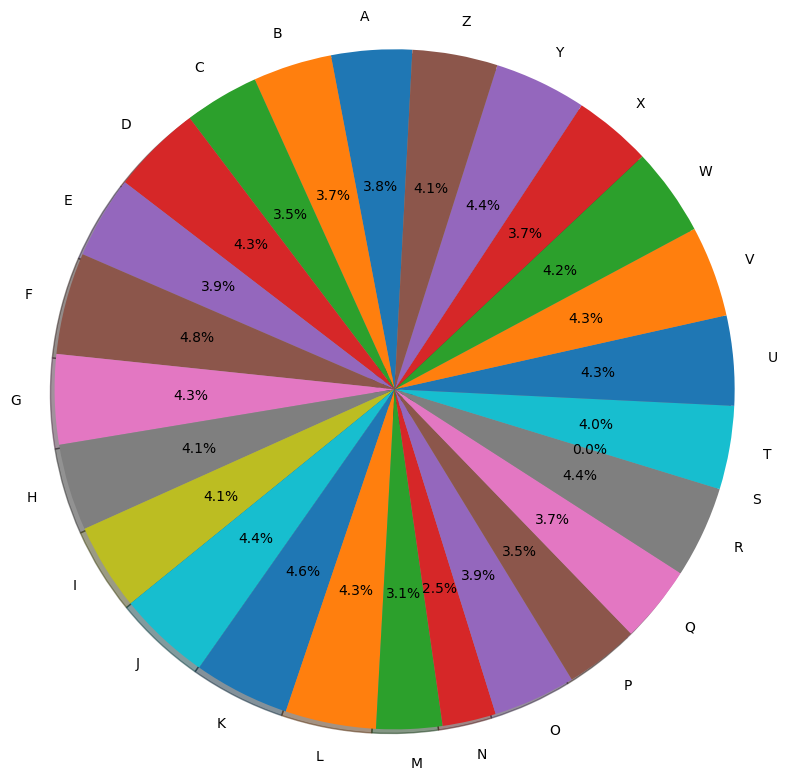

In [62]:
plt.pie(noOfEach,labels=letters, startangle=87,shadow = True,
        radius =2.3, autopct = '%1.1f%%')
# plt.legend()
plt.savefig('dataSetPieChart.png',bbox_inches='tight',pad_inches=0.1)
plt.show()


In [60]:
x_train, x_test, y_train, y_test = train_test_split(
    dataset, label, test_size=0.2, random_state=42, stratify=label)


In [61]:
n_estimators = [1, 2, 4, 8, 16,24, 32, 64,80,100,150,200]
res_noBoot=[]
res_boot=[]
# for estimator in n_estimators:
#     rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
#     rf.fit(x_train, y_train)
#     y_predict = rf.predict(x_test)
#     score = accuracy_score(y_predict, y_test)
#     res_noBoot.append(score)
print("NOW BOOTSTRAP TRUE")
for estimator in n_estimators:
    rf = RandomForestClassifier(
        n_estimators=estimator, n_jobs=-1,bootstrap=True, random_state=42)
    rf.fit(x_train, y_train)
    y_predict = rf.predict(x_test)
    score = accuracy_score(y_predict, y_test)
    res_boot.append(score)


NOW BOOTSTRAP TRUE


In [63]:
for i,j in zip(n_estimators,res_boot):
    print(i,j)

1 0.8634463912554252
2 0.8627230348818518
4 0.9519369876225687
8 0.9718694743610352
16 0.9804693779135187
24 0.9812731072174892
32 0.982800192895033
64 0.9844880244333708
80 0.9844076515029738
100 0.984809516154959
150 0.9853721266677383
200 0.9861758559717088


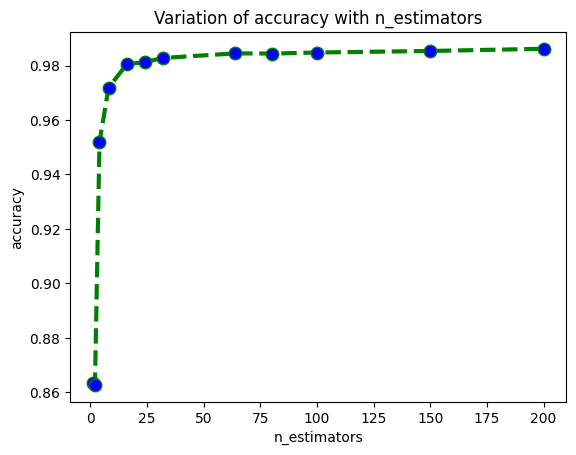

In [64]:
# plt.plot(n_estimators,res_noBoot,label ='w/o bootstrap')
plt.plot(n_estimators, res_boot, label='with bootstrap', color='green', linestyle='dashed', linewidth=3,
         marker='o', markerfacecolor='blue', markersize=9)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
# plt.xlim(0, 50)
# plt.ylim(0.6,1)
plt.title('Variation of accuracy with n_estimators')
# plt.legend()
plt.savefig('Variation_of_accuracy_with_n_estimators.png',bbox_inches='tight',pad_inches=0.1)
plt.show()


In [65]:
n_estimators = [16,17,18,20,22,25,26]
for estimator in n_estimators:
    rf = RandomForestClassifier(
        n_estimators=estimator, n_jobs=-1, bootstrap=True, random_state=42)
    rf.fit(x_train, y_train)
    y_predict = rf.predict(x_test)
    score = accuracy_score(y_predict, y_test)
    print(score, estimator)

0.9804693779135187 16
0.9803086320527247 17
0.9809516154959009 18
0.9809516154959009 20
0.9813534801478861 22
0.9816749718694744 25
0.9817553447998714 26


In [66]:
model = RandomForestClassifier(random_state=42, n_estimators=8,bootstrap=True,n_jobs=-1)

# model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=8, n_jobs=-1, random_state=42)

In [67]:
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)
print(score)
# 0.9997576932396414


0.9718694743610352


In [68]:
# model.feature_importances_
model.__dict__



{'estimator': DecisionTreeClassifier(),
 'n_estimators': 8,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha',
  'monotonic_cst'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': -1,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'monotonic_cst': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 84,
 '_n_samples': 49764,
 'n_outputs_': 1,
 'classes_': array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
        'nothing', 'space'], dtype='<U7'),
 'n_classes_': 27,
 '_n_sample

In [69]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           A       0.96      0.99      0.98       462
           B       0.97      0.99      0.98       451
           C       0.98      0.99      0.98       427
           D       0.98      0.98      0.98       516
           E       0.98      0.99      0.98       472
           F       0.99      0.99      0.99       583
           G       0.97      1.00      0.98       515
           H       0.99      0.97      0.98       496
           I       0.99      0.98      0.98       496
           J       0.98      0.97      0.98       531
           K       0.97      0.98      0.97       549
           L       1.00      1.00      1.00       519
           M       0.89      0.92      0.90       377
           N       0.93      0.89      0.91       307
           O       0.98      0.99      0.98       472
           P       0.99      0.96      0.97       423
           Q       0.98      0.98      0.98       442
           R       0.95    

In [70]:
q = open('model_4.p', 'wb')
pickle.dump({'model_4': model}, q)
q.close()


In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=50)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)
print(score)

0.9718694743610352


In [73]:
import pickle
import cv2

In [76]:
model_dict = pickle.load(open('./model_4.p', 'rb'))
model = model_dict['model_4']


In [77]:
model.__dict__

{'estimator': DecisionTreeClassifier(),
 'n_estimators': 8,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha',
  'monotonic_cst'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': -1,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'monotonic_cst': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 84,
 '_n_samples': 49764,
 'n_outputs_': 1,
 'classes_': array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
        'nothing', 'space'], dtype='<U7'),
 'n_classes_': 27,
 '_n_sample

In [78]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    result = hands.process(frame_rgb)
    if result.multi_hand_landmarks:
        draw(frame, result)
        frameData = exrtractData(result)
        # print(len(frameData))

        pred = model.predict([np.asarray(frameData)])
        cv2.putText(frame, pred[0], (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                    cv2.LINE_AA)

    # Show to screen
    cv2.imshow('OpenCV Feed', frame)
    referenceImg = cv2.imread('col.png')
    cv2.imshow('Reference', referenceImg)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()
